## Observations and Insights 

In [ ]:
* Based on the summary statistics, the SEM shows that "Capomulin" has the lowest sem value which mean its mean is closer to the population mean than other drugs.
* In the bar chart, it shows that the number of mice surved through the course of the study are highest in testing group "Capomulin" and "Ramicane".
* In the boxplot chart, the final tumor volumns are significantly smaller in testing group "Capomulin" and "Ramicane" than in "Infubinol" and "Ceftamin"\
  which means "Capomulin" and "Ramicane" are more effective in tumor treatement than the other two drugs. 
* The line plot of time point versus tumor volume for mouse ID s185 treated with Capomulin shows that the tumor volumn decreased significantly over time.
* The scatter plot shows that there is a positive correlation between moue weight and tumor volume. The correlation coefficient of the linear regression is 0.95, \
  which reinforces the positive correlation between weight and tumor volumn.

In [248]:
%matplotlib inline

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.DataFrame.merge(mouse_metadata,study_results, on="Mouse ID")

#df.drop_duplicates(subset =["Mouse ID", "Timepoint"], keep = False, inplace = True)

df.count()


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [2]:
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
group_df=df.groupby(df["Mouse ID"])
df1=pd.DataFrame(group_df["Timepoint"].value_counts())
df1.loc[df1["Timepoint"]>1]
#df2=df.loc[df.duplicated(subset=["Mouse ID", "Timepoint"])==True,"Mouse ID"].unique()
#df2

Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_df=df.loc[df["Mouse ID"] == 'g989']
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df=df.drop(index=df[df["Mouse ID"]=="g989"].index)
# clean_df
clean_df=df.loc[df["Mouse ID"]!="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
total=len(clean_df["Mouse ID"].value_counts())
total

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug=df.groupby(df["Drug Regimen"])

mean_df = drug["Tumor Volume (mm3)"].mean()
median_df = drug["Tumor Volume (mm3)"].median()
var_df = drug["Tumor Volume (mm3)"].var()
std_df = drug["Tumor Volume (mm3)"].std()
sem_df = drug["Tumor Volume (mm3)"].sem()

summary= pd.DataFrame({"Mean":mean_df,
                       "Median":median_df,
                        "Variance": var_df,
                        "Standard Deviation": std_df,
                        "SEM": sem_df})
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
df.groupby(df["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

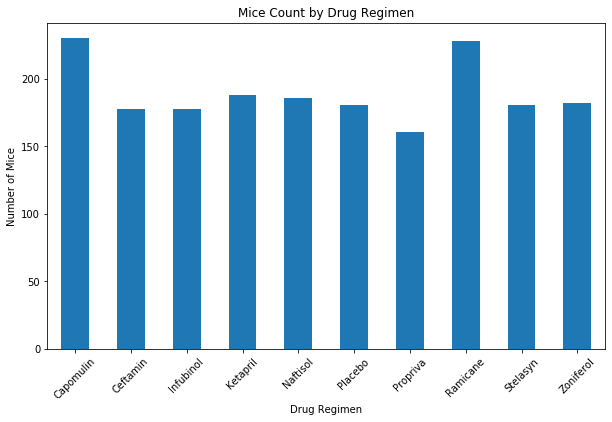

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

count_df=drug["Mouse ID"].count()
count_df.plot(kind="bar", figsize=(10,6))

plt.xticks(rotation=45)
plt.title("Mice Count by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


Text(0, 0.5, 'Number of Mice')

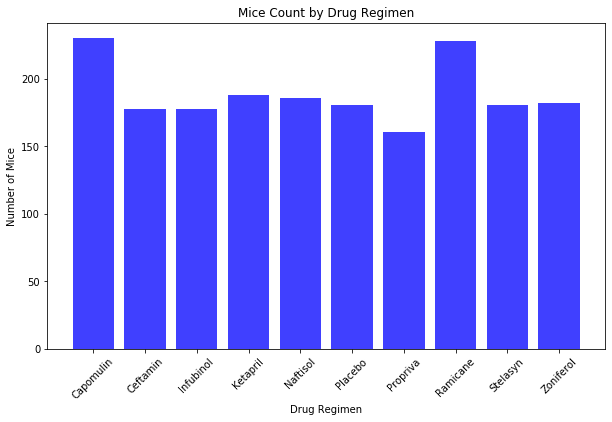

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

count=drug["Mouse ID"].count()
mice_index=count.index
x_axis = np.arange(len(mice_index))


plt.figure(figsize=(10,6))
plt.bar(x_axis, count, color='b', alpha=0.75, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mice_index, rotation=45)

#plt.xlim(-0.75, len(x_axis)-0.25)
#plt.ylim(0, max(count)+100)

plt.title("Mice Count by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


Text(0.5, 1.0, 'Mice count by sex')

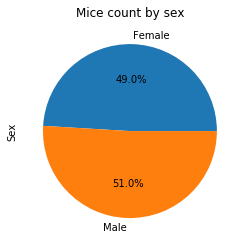

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count=clean_df.groupby(df["Sex"]).count()
sex_count["Sex"].plot(kind='pie',autopct="%1.1f%%")
plt.title("Mice count by sex")


Text(0.5, 1.0, 'Mice count by sex')

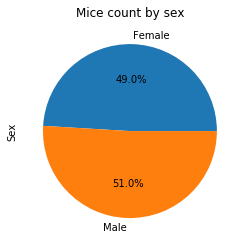

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=sex_count.index
sizes = sex_count["Sex"]
#colors = ["blue", "orange"]
#explode = (0.1, 0)
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=False, startangle=0)
#plt.axis("equal")
plt.ylabel("Sex")
plt.title("Mice count by sex")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [15]:
# Start by getting the last (greatest) timepoint for each mouse
clean_group=clean_df.groupby(clean_df["Mouse ID"])
max_timepoint=clean_group["Timepoint"].max()
max_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [16]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_max=pd.merge(max_timepoint, clean_df, on=["Timepoint","Mouse ID"], how= "left")

tumor_max

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a262,Placebo,Female,17,29,70.717621,4
3,45,a275,Ceftamin,Female,20,28,62.999356,3
4,30,a366,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,10,z435,Propriva,Female,12,26,48.710661,0
244,45,z578,Ramicane,Male,11,16,30.638696,0
245,45,z581,Infubinol,Female,24,25,62.754451,3
246,45,z795,Naftisol,Female,13,29,65.741070,3


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
tumor_volume=[]
drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
for drug in drugs:
    tumor_vol=tumor_max.loc[tumor_max["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    tumor_volume.append(tumor_vol)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    quartiles = tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq =quartiles[0.75]
    iqr = upperq-lowerq
 # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers=[]
    for i in tumor_vol:
        if (i>upper_bound) or (i<lower_bound):
            outliers.append(i)
    
    print(f"{drug}'s outliers: {outliers}")
    

Capomulin's outliers: []
Ramicane's outliers: []
Infubinol's outliers: [36.321345799999996]
Ceftamin's outliers: []


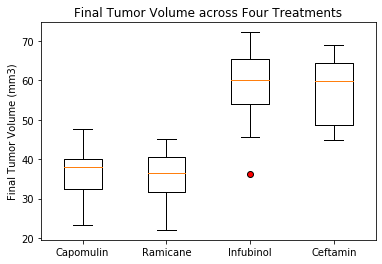

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_dot = dict(markerfacecolor='r', marker='o')

fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume across Four Treatments")
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume, labels=drugs, flierprops=red_dot)
plt.show()

## Line and Scatter Plots

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
capomulin

capomulin_s185=capomulin.loc[capomulin['Mouse ID'] == 's185']
capomulin_s185

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


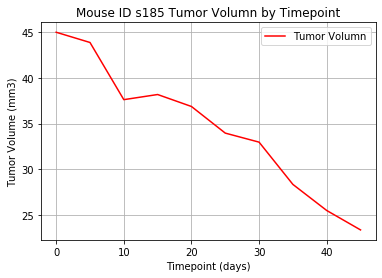

In [20]:
lineplot,=plt.plot(capomulin_s185["Timepoint"], capomulin_s185["Tumor Volume (mm3)"], color="red", label="Tumor Volumn")
plt.title("Mouse ID s185 Tumor Volumn by Timepoint")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend(loc="best")

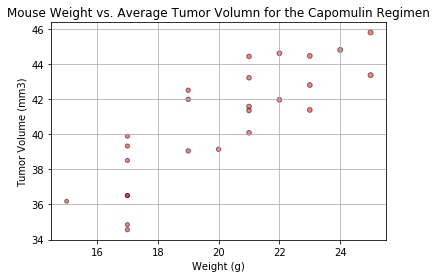

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_weight=capomulin[["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]
capomulin_group  =capomulin_weight.groupby(capomulin_weight["Mouse ID"])
weight=capomulin_group["Weight (g)"].mean()
tumor_vol=capomulin_group["Tumor Volume (mm3)"].mean()
plt.scatter(weight, tumor_vol, marker="o", facecolors="red", edgecolors="black",
            s=weight, alpha=0.5)

plt.title("Mouse Weight vs. Average Tumor Volumn for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.95


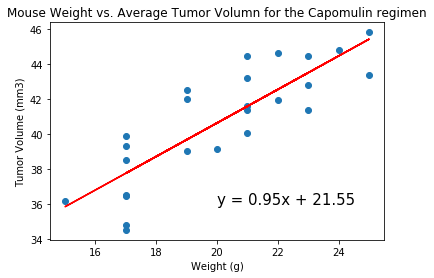

In [22]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = weight
y_values = tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="black")

plt.title("Mouse Weight vs. Average Tumor Volumn for the Capomulin regimen")
plt.xlabel('Weight (g)')
plt.ylabel("Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {slope:,.2f}")
plt.show()